In [15]:
pip install bokeh

In [34]:
from bs4 import BeautifulSoup
import requests
import re
from threading import Thread
import pickle
import matplotlib.pyplot as plt
import numpy as np

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import time

import plotly.graph_objects as go
from bokeh.plotting import figure, show
from bokeh.io import output_file, output_notebook
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.transform import factor_cmap
import seaborn as sns
import plotly.express as px

from sklearn import metrics, svm, neighbors, neural_network, tree, naive_bayes, datasets, ensemble, linear_model

In [ ]:
url = 'https://www.banki.ru/services/responses/list/'
root = "https://www.banki.ru"

page = requests.get(url)

In [ ]:
content = page.text
soup = BeautifulSoup(content, "lxml")
rws = soup.find_all('div', {"class" : "la8a5ef73"})

In [ ]:
reviews = []
root = "https://www.banki.ru"

def parse(start, end, rate):
  for x in range(start, end):
    url =  f'https://www.banki.ru/services/responses/list/?page={x}&is_countable=on&rate={rate}'
    page = requests.get(url)
    content = page.text
    soup = BeautifulSoup(content, "lxml")
    rws = soup.find_all('div', {"class" : "la8a5ef73"})
    for i in range(len(rws) -1):
      urlRw = root + rws[i].find_all("a", {"class": "link-simple"})[0]['href']
      page = requests.get(urlRw)
      content = page.text
      soup = BeautifulSoup(content, "lxml")
      try:
        reviews.append(("".join(p.text for p in [soup.find("div", {"class": "lb1789875"}).find_all("p")]), rate))
      except:
        reviews.append((soup.find("div", {"class": "lb1789875"}).text, rate))

In [ ]:
thrds = [Thread(target=parse, args=(2+i*4, 2+ (i+1) * 4, r)) for i in range(0, 10) for r in range(1,6)]
for thrd in thrds:
  thrd.start()
for thrd in thrds:
  thrd.join()

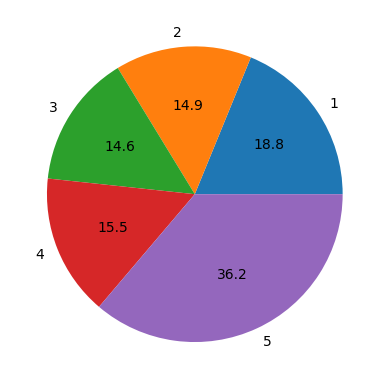

In [ ]:
classes = np.unique(np.array(reviews)[:, 1], return_counts=True)
plt.pie(classes[1], labels=classes[0], autopct='%.1f');

In [ ]:
f = open('data', 'wb')
pickle.dump(reviews, f)
f.close()

f = open('data', 'rb')
data = pickle.load(f)
f.close()

In [ ]:
data = np.array(data)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data[:,0])
y = data[:, 1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
models = {
    'Naive Bayes': GaussianNB(),
    'Logistic regression': LogisticRegression(),
    'Decision tree': DecisionTreeClassifier(),
    'k Nearest Neighbor n=3': KNeighborsClassifier(n_neighbors = 3),
    'k Nearest Neighbor n=5': KNeighborsClassifier(n_neighbors = 5),
    'k Nearest Neighbor n=7': KNeighborsClassifier(n_neighbors = 7),
    'Random forest n=100': RandomForestClassifier(n_estimators= 100),
    'Random forest n=100': RandomForestClassifier(n_estimators= 30),
    'Random forest n=100': RandomForestClassifier(n_estimators= 150),
    'Ridge Classifier': RidgeClassifier()
}

In [ ]:
results = pd.DataFrame(columns=['Модель', 'Время обучения', 'Время тестирования', 'Точность'])


for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train.toarray(), y_train)
    training_time = time.time() - start_time

    start_time = time.time()
    y_pred = model.predict(X_test.toarray())
    testing_time = time.time() - start_time

    accuracy = accuracy_score(y_test, y_pred)

    results = results.append({'Модель': model_name, 'Время обучения': training_time,
                              'Время тестирования': testing_time, 'Точность': accuracy}, ignore_index=True)

<ipython-input-23-558afa14b8af>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Модель': model_name, 'Время обучения': training_time,
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-23-558afa14b8af>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Модель': model_name, 'Время обучения': 

In [ ]:
results

,Модель,Время обучения,Время тестирования,Точность
0,Naive Bayes,9.304778,3.380936,0.525626
1,Logistic regression,264.304797,0.798850,0.660023
2,Decision tree,41.064654,0.629301,0.553531
3,k Nearest Neighbor n=3,1.915011,28.479195,0.494305
4,k Nearest Neighbor n=5,1.934144,28.867060,0.502847
5,k Nearest Neighbor n=7,3.422244,27.893462,0.521071
6,Random forest n=100,70.652481,0.886735,0.591116
7,Ridge Classifier,52.393666,0.689868,0.670843


In [ ]:
model = LogisticRegression()
model.fit(X_train.toarray(), y_train)
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.66      0.80      0.72       344
           2       0.46      0.37      0.41       255
           3       0.53      0.38      0.44       245
           4       0.59      0.36      0.45       274
           5       0.76      0.94      0.84       638

    accuracy                           0.66      1756
   macro avg       0.60      0.57      0.57      1756
weighted avg       0.64      0.66      0.64      1756



In [ ]:
data[:,1] = np.where(data[:,1] == "1", "Плохо", data[:, 1])
data[:,1] = np.where(data[:,1] == "2", "Плохо", data[:, 1])
data[:,1] = np.where(data[:,1] == "3", "Средне", data[:, 1])
data[:,1] = np.where(data[:,1] == "4", "Средне", data[:, 1])
data[:,1] = np.where(data[:,1] == "5", "Хорошо", data[:, 1])

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data[:,0])
y = data[:, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

results = pd.DataFrame(columns=['Модель', 'Время обучения', 'Время тестирования', 'Точность'])

for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train.toarray(), y_train)
    training_time = time.time() - start_time

    start_time = time.time()
    y_pred = model.predict(X_test.toarray())
    testing_time = time.time() - start_time

    accuracy = accuracy_score(y_test, y_pred)

    results = results.append({'Модель': model_name, 'Время обучения': training_time,
                              'Время тестирования': testing_time, 'Точность': accuracy}, ignore_index=True)
results

<ipython-input-29-ca6c79aa0582>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Модель': model_name, 'Время обучения': training_time,
<ipython-input-29-ca6c79aa0582>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Модель': model_name, 'Время обучения': training_time,
<ipython-input-29-ca6c79aa0582>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Модель': model_name, 'Время обучения': training_time,
<ipython-input-29-ca6c79aa0582>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Модель': model_name, 'Время обучения': trainin

,Модель,Время обучения,Время тестирования,Точность
0,Naive Bayes,7.016783,2.212845,0.609909
1,Logistic regression,101.365215,0.842447,0.756834
2,Decision tree,37.773254,0.597268,0.640091
3,k Nearest Neighbor n=3,2.508767,27.408900,0.616173
4,k Nearest Neighbor n=5,2.419914,28.117573,0.624715
5,k Nearest Neighbor n=7,2.888276,28.033435,0.639522
6,Random forest n=100,71.438245,0.869850,0.727221
7,Ridge Classifier,53.779190,0.758091,0.759112


In [ ]:
model = LogisticRegression()
model.fit(X_train.toarray(), y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Плохо       0.74      0.85      0.79       599
      Средне       0.64      0.48      0.55       519
      Хорошо       0.84      0.89      0.87       638

    accuracy                           0.76      1756
   macro avg       0.74      0.74      0.74      1756
weighted avg       0.75      0.76      0.75      1756



In [ ]:
rating = []

def parse2(start, end):
  for x in range(start, end):
    url =  f'https://www.banki.ru/services/responses/list/?page={x}&is_countable=on'
    page = requests.get(url)
    content = page.text
    soup = BeautifulSoup(content, "lxml")
    rws = soup.find_all('div', {"class" : "la8a5ef73"})
    for i in range(len(rws) -1):
      rating.append((rws[i].find("img")['alt'], int(rws[i].find("div", {"class": "lb3db10af"}).text)))

thrds = [Thread(target=parse2, args=(2+i*4, 2+ (i+1) * 4)) for i in range(0, 15)]
for thrd in thrds:
  thrd.start()
for thrd in thrds:
  thrd.join()

Exception in thread Thread-94 (parse2):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-31-3ef9e1aa6423>", line 11, in parse2
TypeError: 'NoneType' object is not subscriptable
Exception in thread Thread-99 (parse2):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-31-3ef9e1aa6423>", line 11, in parse2
TypeError: 'NoneType' object is not subscriptable


In [ ]:
f = open('rating', 'wb')
pickle.dump(rating, f)
f.close()

f = open('rating', 'rb')
data = pickle.load(f)
f.close()

In [ ]:
df = pd.DataFrame(rating, columns=["Банк", "Оценка"])

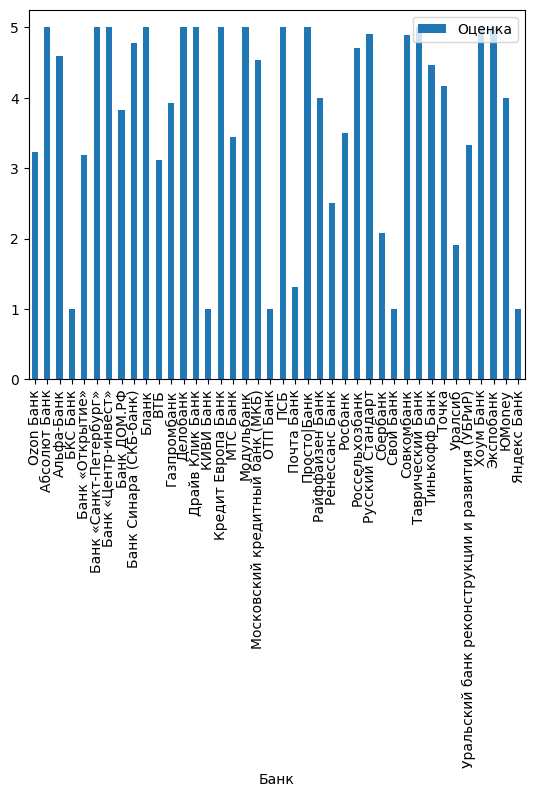

In [ ]:
df.groupby("Банк").mean().plot.bar();

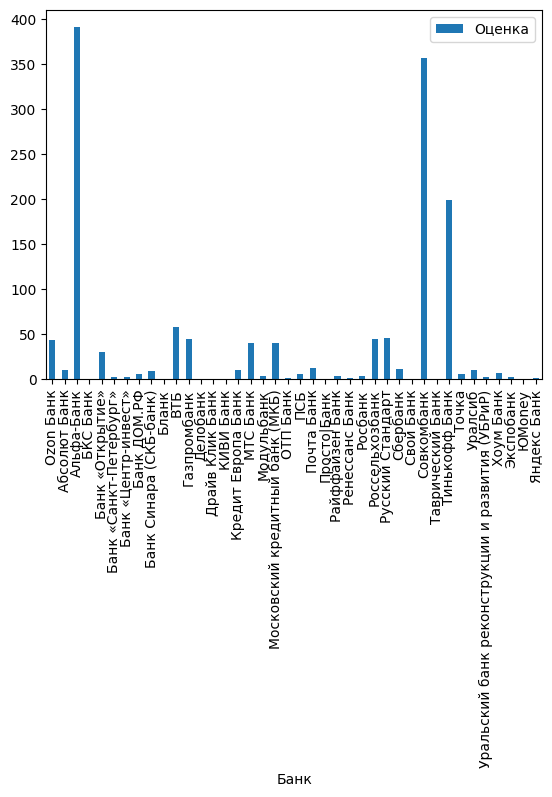

In [36]:
df.groupby("Банк").count().plot.bar();

# Задание

In [3]:
f = open('data', 'rb')
data = pickle.load(f)
f.close()

In [4]:
df = pd.DataFrame(data, columns = ["Отзыв", "Оценка"])

In [5]:
df.head()

,Отзыв,Оценка
0,\nВ отделении на Профсоюзной огромные очереди....,2
1,"\nРеспублика Марии Эл город йошкар Ола, отделе...",5
2,\nОчень благодарна сотруднику Совкомбанка Ники...,5
3,\nОбратился в совкомбанк для получения услуги ...,5
4,\n30 ноября 08:46Я обратилась за консультацией...,5


In [6]:
df["Отзыв"][0]

'\nВ отделении на Профсоюзной огромные очереди. для обычных  граждан всего 2 окна. Причем 2 специалиста по премиальному обслуживанию сидят без клиентов! Очереди. Очереди. Очереди. почему бы не увеличить количество окон приема? И избавить нас от очередей. Это очень странно, количество офисов и так сокращается\xa0\n'

In [7]:
df["Отзыв"] = df.apply(lambda row: row["Отзыв"].replace("\n", '').replace('\xa0', ''), axis = 1)

In [8]:
def rating_str(value):
  if value == 5:
    return "Пять"
  elif value == 4:
    return "Четыре"
  elif value == 3:
    return "Три"
  elif value == 2:
    return "Два"
  elif value == 1:
    return "Единица"
  else:
    return "Без оценки"

df["Оценка_str"] = df.apply(lambda row: rating_str(row["Оценка"]), axis = 1)

In [9]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Pie(labels=df["Оценка_str"].value_counts().index, values=df["Оценка"].value_counts().values,
                             textinfo='label+percent', title='Баланс оценок', insidetextorientation='radial', scalegroup='one')])

fig.update_layout(
    title=dict(text="Баланс оценок", font=dict(size=20), automargin=True, yref='paper')
)

fig.show()

In [10]:
df["Review"] = df.apply(lambda row: 1 if row["Оценка"] == 5 else 0, axis = 1)
df["Review_str"] = df.apply(lambda row: "Позитивный" if row["Review"] == 1 else "Негативный", axis = 1)

In [11]:
df.head()

,Отзыв,Оценка,Оценка_str,Review,Review_str
0,В отделении на Профсоюзной огромные очереди. д...,2,Два,0,Негативный
1,"Республика Марии Эл город йошкар Ола, отделени...",5,Пять,1,Позитивный
2,Очень благодарна сотруднику Совкомбанка Никити...,5,Пять,1,Позитивный
3,Обратился в совкомбанк для получения услуги кр...,5,Пять,1,Позитивный
4,30 ноября 08:46Я обратилась за консультацией к...,5,Пять,1,Позитивный


In [12]:
fig = go.Figure(data=[go.Pie(labels=df["Review_str"].value_counts().index, values=df["Review_str"].value_counts().values,
                             textinfo='label+percent', title='Баланс отзывов', insidetextorientation='radial')])

fig.update_layout(
    title=dict(text="Баланс отзывов", font=dict(size=20), automargin=True, yref='paper')
)
fig.show()

In [13]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["Отзыв"])

y = df["Review"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model_naive = GaussianNB()
model_LR = LogisticRegression()
model_DTR = DecisionTreeClassifier()
model_KNN3 = KNeighborsClassifier(n_neighbors = 3)
model_KNN5 = KNeighborsClassifier(n_neighbors = 5)
model_KNN7 = KNeighborsClassifier(n_neighbors = 7)
model_RF100 = RandomForestClassifier(n_estimators= 100)
model_RF30 = RandomForestClassifier(n_estimators= 30)

In [14]:
model_naive.fit(X_train.toarray(), y_train)
model_LR.fit(X_train.toarray(), y_train)
model_DTR.fit(X_train.toarray(), y_train)
model_KNN3.fit(X_train.toarray(), y_train)
model_KNN5.fit(X_train.toarray(), y_train)
model_KNN7.fit(X_train.toarray(), y_train)
model_RF100.fit(X_train.toarray(), y_train)
model_RF30.fit(X_train.toarray(), y_train)

RandomForestClassifier(n_estimators=30)

In [20]:
naive_train_score = model_naive.score(X_train.toarray(), y_train)
naive_test_score = model_naive.score(X_test.toarray(), y_test)

lr_train_score, lr_test_score = model_LR.score(X_train.toarray(), y_train), model_LR.score(X_test.toarray(), y_test)
dtr_train_score, dtr_test_score = model_DTR.score(X_train.toarray(), y_train), model_DTR.score(X_test.toarray(), y_test)
knn3_train_score, knn3_test_score = model_KNN3.score(X_train.toarray(), y_train), model_KNN3.score(X_test.toarray(), y_test)
knn5_train_score, knn5_test_score = model_KNN5.score(X_train.toarray(), y_train), model_KNN5.score(X_test.toarray(), y_test)
knn7_train_score, knn7_test_score = model_KNN7.score(X_train.toarray(), y_train), model_KNN7.score(X_test.toarray(), y_test)
rf30_train_score, rf30_test_score = model_RF30.score(X_train.toarray(), y_train), model_RF30.score(X_test.toarray(), y_test)
rf100_train_score, rf100_test_score =  model_RF100.score(X_train.toarray(), y_train), model_RF100.score(X_test.toarray(), y_test)

In [28]:
models_coeff = [naive_train_score, naive_test_score,
                lr_train_score, lr_test_score,
                dtr_train_score, dtr_test_score,
                knn3_train_score, knn3_test_score,
                knn5_train_score, knn5_test_score,
                knn7_train_score, knn7_test_score,
                rf30_train_score, rf30_test_score,
                rf100_train_score, rf100_test_score]

models_name = ['наивный байес',
               'логистическая регрессия',
               'дерево решений',
               'метод k ближайших соседей 3',
               'метод k ближайших соседей 5',
               'метод k ближайших соседей 7',
               'random forest 30',
               'random forest 100']

models_t = ['train', 'test']

data = {'name' : models_name,
        'train'   : [
                naive_train_score,
                lr_train_score,
                dtr_train_score,
                knn3_train_score,
                knn5_train_score,
                knn7_train_score,
                rf30_train_score,
                rf100_train_score
                     ],
        'test'   : [
                naive_test_score,
                lr_test_score,
                dtr_test_score,
                knn3_test_score,
                knn5_test_score,
                knn7_test_score,
                rf30_test_score,
                rf100_test_score
                ]}

palette = ["red", "blue"]

x = [(i, j) for i in models_name for j in models_t]
counts = sum(zip(data['train'], data['test']), ()) # like an hstack

source = ColumnDataSource(data = dict(x = x, counts = counts))

p = figure(x_range = FactorRange(*x), width=1600, height = 500, title = "Сравнение коэффециентов моделей регрессии",
           toolbar_location = None, tools = "")

p.vbar(x = 'x', top = 'counts', width = 0.8, source = source,
       fill_color = factor_cmap('x', palette = palette, factors = models_t, start = 1, end = 2))

output_notebook()
show(p)

In [33]:
models_name = ['наивный байес train',
               'наивный байес test',
               'логистическая регрессия train',
               'логистическая регрессия test',
               'дерево решений train',
               'дерево решений test',
               'метод k ближайших соседей 3 train',
               'метод k ближайших соседей 3 test',
               'метод k ближайших соседей 5 train',
               'метод k ближайших соседей 5 test',
               'метод k ближайших соседей 7 train',
               'метод k ближайших соседей 7 test',
               'random forest 30 train',
               'random forest 30 test',
               'random forest 100 train',
               'random forest 100 test',
               ]

colors = ['тренировочная' if c % 2 == 0 else 'тестовая' for c in range(len(models_name))]

fig = px.bar(
    x = models_name, y = models_coeff, color = colors,
    color_discrete_sequence=['red', 'blue'],
    title = 'Сравнение результатов различных моделей'
)
fig.show()

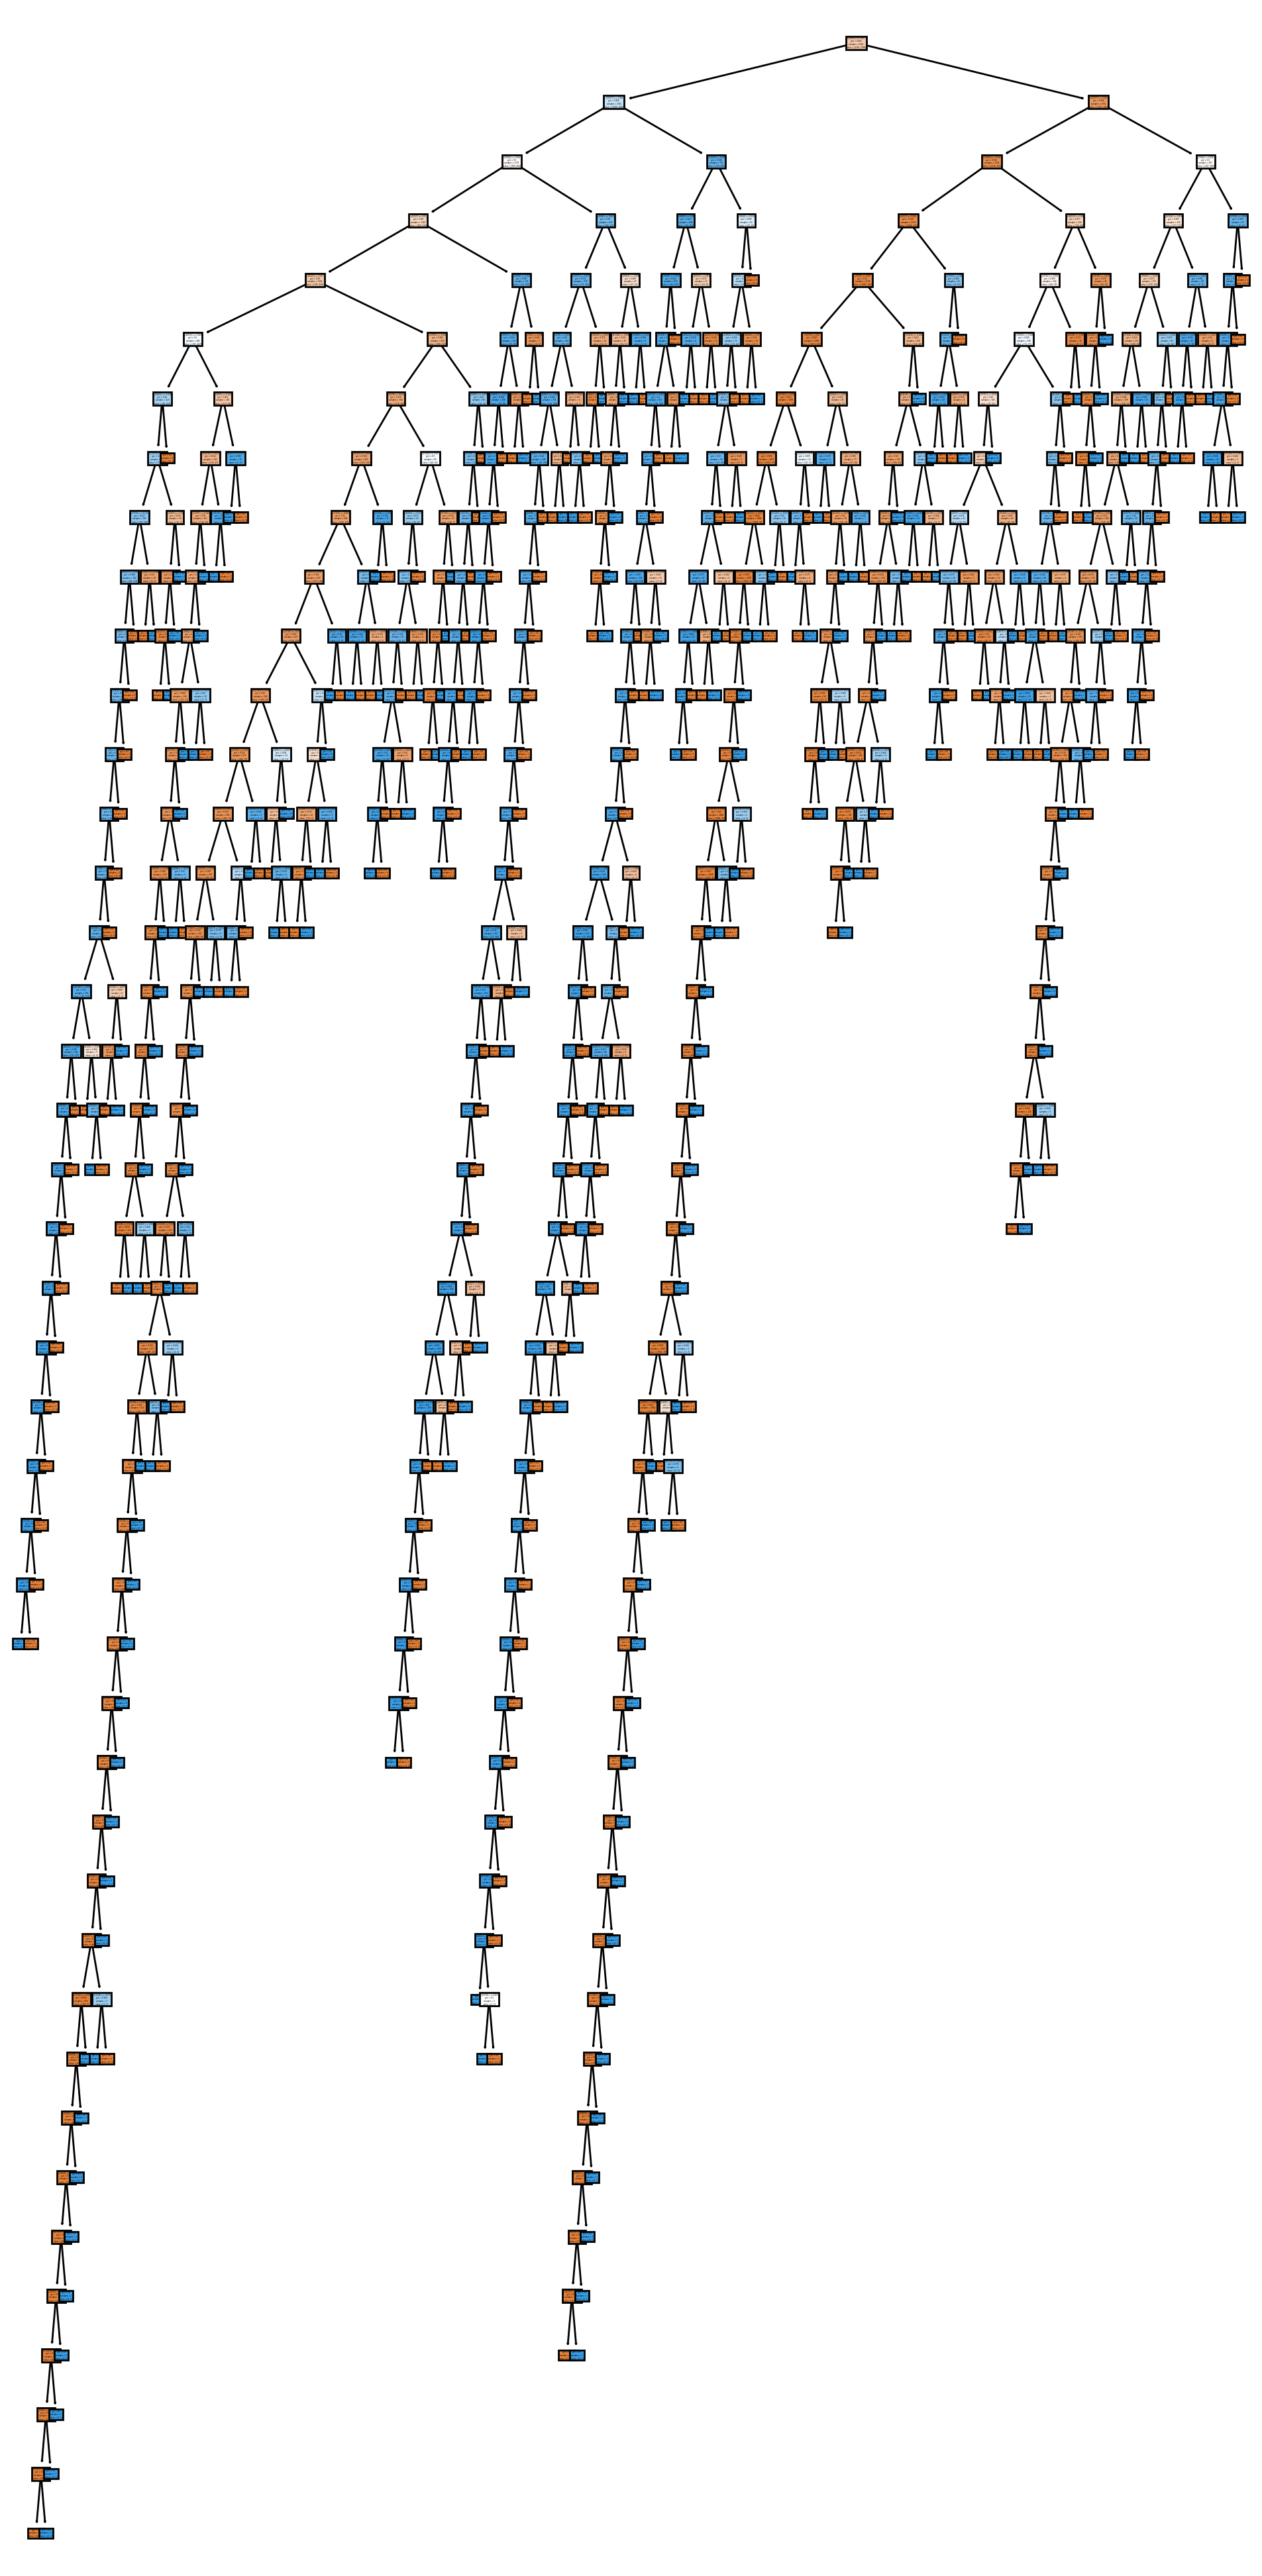

In [37]:
plt.figure(figsize = (12, 25), dpi = 200)
tree.plot_tree(model_DTR, filled = True)
plt.show()